In [122]:
import tensorflow as tf
import numpy as np

from mrl import *
from A3Ccustom import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## train

In [129]:
agent = MRLAgent(gamma=0.9)
train_data = agent.train(15000)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


### eval plot

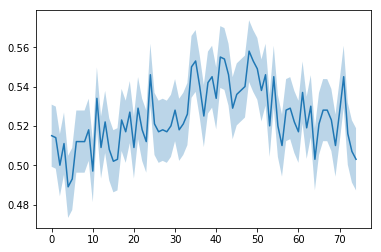

In [130]:
neval_eps = 1000
eval_reward = agent.eval(neval_eps)
M = eval_reward.mean(0)
S = eval_reward.std(0)/np.sqrt(neval_eps)
plt.plot(M)
plt.fill_between(range(len(M)),M-S,M+S,alpha=.3)

### regret plot

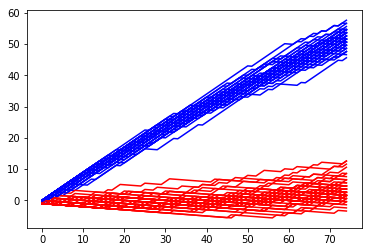

In [132]:
# is the agent just exploting one arm which is slightly more likely under the current random seed?

for i in range(100):
  eval_reward = agent.eval(1)
  bandit = np.round(agent.env.banditpr[0],1)
  if bandit==0.1:c='r'
  elif bandit==0.9:c='b'
  regret=.9*np.arange(T)-np.cumsum(eval_reward)
  plt.plot(regret,color=c)
  


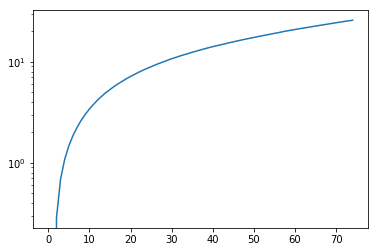

In [62]:

plt.plot(np.mean(.9*np.arange(T)-,axis=0))
plt.yscale('log')